[View in Colaboratory](https://colab.research.google.com/github/kookoowaa/Projects/blob/master/Churn_with_Online_game/Test_cwp.ipynb)

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_id = '1UKQ6pt47ogMjOi3bsyIuFWf5Bw8Epont'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('label')

In [5]:
import pandas as pd
label_data = pd.read_csv('label')
label_data.head()

,acc_id,label
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week


In [0]:
file_id = '1bsa0jiYWjdLkVV5-ax4h5Hhu9Ev6znhU'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('activity')
activity = pd.read_csv('activity')


In [7]:
activity_log = pd.merge(activity, label_data, on = 'acc_id')
activity_log.head()


,wk,acc_id,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,...,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt,label
0,7,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,4,2.088814,4.405057,-0.245477,4.454059,3.009797,-0.306354,1.184011,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,3.466939,-0.027758,-0.365536,month
1,8,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,5,2.673460,4.760178,-0.222527,6.107479,4.758528,-0.306354,1.709534,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,5.070359,-0.027758,-0.365536,month
2,3,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,2,-0.649522,-0.231021,-0.290803,-0.245978,-0.487666,-0.306354,-0.566706,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536,retained
3,4,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,2,-0.658235,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536,retained
4,5,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,4,-0.654734,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536,retained


In [9]:
print(activity_log.shape)
print(len(activity_log['acc_id'].unique()))


(440323, 39)
100000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff426ea8290>,
      dtype=object)

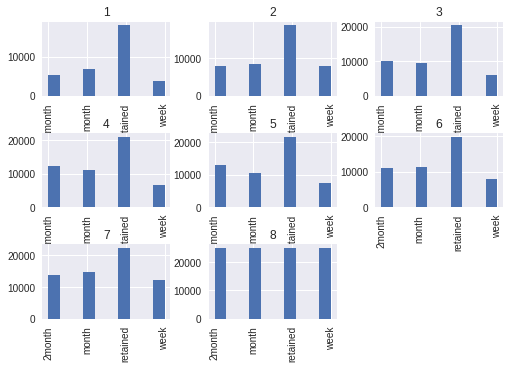

In [11]:
activity_log['label'].hist(by = activity_log['wk'], stacked = True)

In [20]:
activity_log.groupby(['wk', 'label'])['acc_id'].count()

wk  label   
1   2month       5260
    month        6773
    retained    17950
    week         3724
2   2month       8008
    month        8440
    retained    18675
    week         7970
3   2month      10034
    month        9631
    retained    20391
    week         6066
4   2month      12482
    month       11039
    retained    21122
    week         6787
5   2month      12867
    month       10545
    retained    21700
    week         7473
6   2month      11176
    month       11448
    retained    19964
    week         7960
7   2month      13815
    month       14597
    retained    22308
    week        12118
8   2month      25000
    month       25000
    retained    25000
    week        25000
Name: acc_id, dtype: int64

In [21]:
activity_log.groupby('wk')['acc_id'].count()

wk
1     33707
2     43093
3     46122
4     51430
5     52585
6     50548
7     62838
8    100000
Name: acc_id, dtype: int64